# Imports

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import string

import re

from tensorflow.keras.preprocessing.text import text_to_word_sequence

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import models
from tensorflow.keras.utils import plot_model


In [2]:
df = pd.read_csv(file_path = '/Users/christine/Desktop/CAS_AML_project_repo/data/CLEAR Corpus 6.01 - CLEAR Corpus 6.01.csv')


# Exploration

In [3]:
df.head()


,ID,Last Changed,Author,Title,Anthology,URL,Source,Pub Year,Category,Location,...,CAREC_M,CARES,CML2RI,firstPlace_pred,secondPlace_pred,thirdPlace_pred,fourthPlace_pred,fifthPlace_pred,sixthPlace_pred,Kaggle split
0,400,NaN,Carolyn Wells,Patty's Suitors,NaN,http://www.gutenberg.org/cache/epub/5631/pg563...,gutenberg,1914.0,Lit,mid,...,0.11952,0.457534,12.097815,-0.383831,-0.283604,-0.346879,-0.281620,-0.247767,-0.289945,Train
1,401,NaN,Carolyn Wells,Two Little Women on a Holiday,NaN,http://www.gutenberg.org/cache/epub/5893/pg589...,gutenberg,1917.0,Lit,mid,...,0.04921,0.462510,22.550179,-0.260307,-0.209960,-0.061565,-0.234231,-0.201347,-0.156156,Train
2,402,NaN,Carolyn Wells,Patty Blossom,NaN,http://www.gutenberg.org/cache/epub/20945/pg20...,gutenberg,1917.0,Lit,mid,...,0.09724,0.369259,18.125279,-0.615037,-0.530600,-0.527847,-0.550180,-0.565762,-0.538852,Train
3,403,NaN,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,NaN,http://www.gutenberg.org/files/25564/25564-h/2...,gutenberg,1863.0,Lit,mid,...,0.08856,0.390759,10.959460,-1.528806,-1.525546,-1.471455,-1.265776,-1.422547,-1.393155,Test
4,404,NaN,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,The Heroes\n or Greek Fairy Tales for my...,http://www.gutenberg.org/files/677/677-h/677-h...,gutenberg,1889.0,Lit,mid,...,0.08798,0.389226,3.195960,-1.335586,-1.321922,-1.163985,-1.122501,-1.185518,-1.271324,Train


In [4]:
df.shape


(4724, 40)

In [5]:
df.columns


Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')

In [6]:
df = df.drop(columns=['Last Changed', 'URL', 'Anthology', 'MPAA \n#Max', 'Pub Year', 'MPAA\n#Avg', 'License', 'British Words', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred', 'ID', 'Author', 'Title', 'Source', 'Category', 'Location', 'MPAA\nMax', 'BT s.e.', 'Kaggle split'])


In [7]:
df.head()


,Excerpt,Google\nWC,Joon\nWC v1,British WC,Sentence\nCount v1,Sentence\nCount v2,Paragraphs,BT Easiness,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI
0,When the young people returned to the ballroom...,174,179,1,11,11,6,-0.340259,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,0.457534,12.097815
1,"All through dinner time, Mrs. Fayre was somewh...",164,184,0,15,15,6,-0.315372,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,0.462510,22.550179
2,"As Roger had predicted, the snow departed as q...",162,180,0,11,11,5,-0.580118,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,0.369259,18.125279
3,Mr. Grimes was to come up next morning to Sir ...,159,160,0,3,3,1,-1.785965,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,0.390759,10.959460
4,And outside before the palace a great garden w...,163,164,1,5,5,2,-1.054013,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,0.389226,3.195960


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Excerpt                             4724 non-null   object 
 1   Google
WC                           4724 non-null   int64  
 2   Joon
WC v1                          4724 non-null   int64  
 3   British WC                          4724 non-null   int64  
 4   Sentence
Count v1                   4724 non-null   int64  
 5   Sentence
Count v2                   4724 non-null   int64  
 6   Paragraphs                          4724 non-null   int64  
 7   BT Easiness                         4724 non-null   float64
 8   Flesch-Reading-Ease                 4724 non-null   float64
 9   Flesch-Kincaid-Grade-Level          4724 non-null   float64
 10  Automated Readability Index         4724 non-null   float64
 11  SMOG Readability                    4724 no

In [9]:
# profile = ProfileReport(df, title="Profiling Report")


In [10]:
# profile.to_widgets()


In [11]:
np.mean(df['BT Easiness'])


-0.9576386305268841

In [12]:
np.median(df['BT Easiness'])


-0.9090941785

/Users/christine/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christine/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


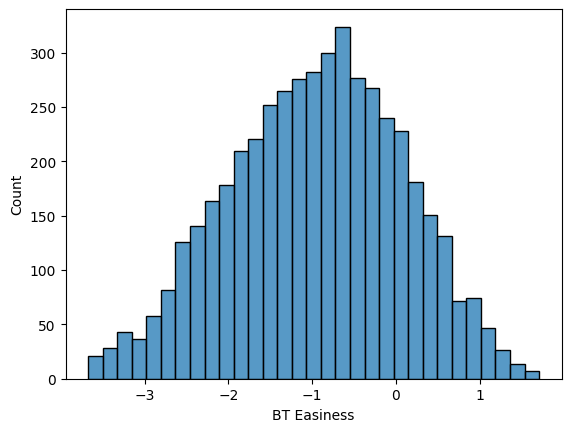

In [13]:
sns.histplot(data=df, x='BT Easiness', kde=False)
plt.show()

/Users/christine/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christine/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


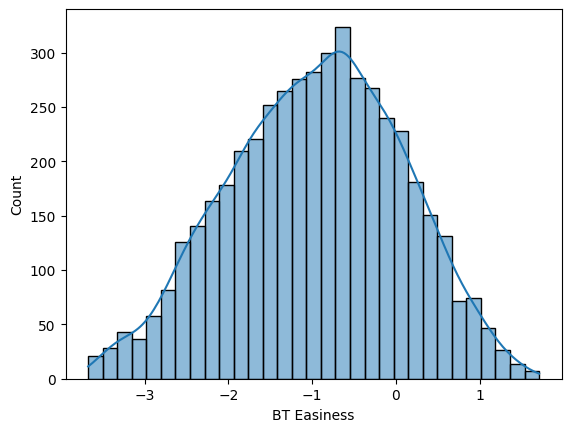

In [14]:
sns.histplot(data=df, x='BT Easiness', kde=True)
plt.show()

/Users/christine/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='BT Easiness'>

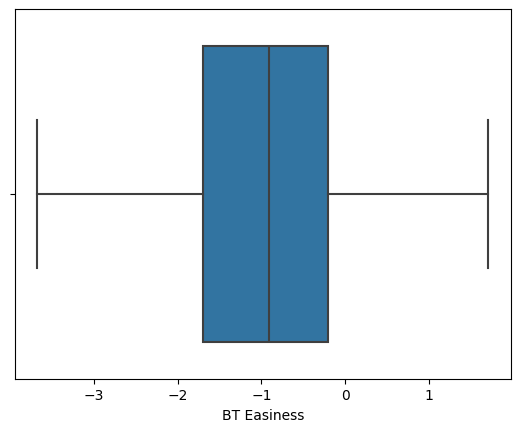

In [15]:
sns.boxplot(data = df, x='BT Easiness')


In [16]:
df[df['BT Easiness'] > 0]['Excerpt'].iloc[0]


'Once upon a time there were Three Bears who lived together in a house of their own in a wood. One of them was a Little, Small, Wee Bear; and one was a Middle-sized Bear, and the other was a Great, Huge Bear. They had each a pot for their porridge; a little pot for the Little, Small, Wee Bear; and a middle-sized pot for the Middle Bear; and a great pot for the Great, Huge Bear. And they had each a chair to sit in; a little chair for the Little, Small, Wee Bear; and a middle-sized chair for the Middle Bear; and a great chair for the Great, Huge Bear. And they had each a bed to sleep in; a little bed for the Little, Small, Wee Bear; and a middle-sized bed for the Middle Bear; and a great bed for the Great, Huge Bear.'

In [17]:
df[df['BT Easiness'] < -2]['Excerpt'].iloc[0]


"It was believed by the principal men of Virginia that Talbot's sympathies were with the revolted colonies; but the influence of his mother, to whom he had been accustomed to defer, had hitherto proved sufficient to prevent him from openly declaring himself. His visit to England, and the delightful reception he had met with there, had weakened somewhat the ties which bound him to his native country, and he found himself in a state of indecision as humiliating as it was painful. Lord Dunmore and Colonel Wilton had each made great efforts to enlist his support, on account of his wealth and position and high personal qualities. It was hinted by one that the ancient barony of the Talbots would be revived by the king; and the gratitude of a free and grateful country, with the consciousness of having materially aided in acquiring that independence which should be the birthright of every Englishman, was eloquently portrayed by the other. When to the last plea was added the personal preference

# Feature Creation

### Adding Excerpt lenght in characters feature

In [18]:
df['len_char'] = df['Excerpt'].apply(lambda x: len(x))


### Adding Punctuation Ratio

In [19]:
import string

def count_punctuation(x):

    punc = string.punctuation

    count=0

    for char in x:
        if char in punc:
            count+=1

    return count/ len(x)

df['punctuation_ratio'] = df['Excerpt'].apply(count_punctuation)

df.head()


,Excerpt,Google\nWC,Joon\nWC v1,British WC,Sentence\nCount v1,Sentence\nCount v2,Paragraphs,BT Easiness,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,len_char,punctuation_ratio
0,When the young people returned to the ballroom...,174,179,1,11,11,6,-0.340259,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,0.457534,12.097815,992,0.027218
1,"All through dinner time, Mrs. Fayre was somewh...",164,184,0,15,15,6,-0.315372,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,0.462510,22.550179,937,0.059765
2,"As Roger had predicted, the snow departed as q...",162,180,0,11,11,5,-0.580118,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,0.369259,18.125279,908,0.051762
3,Mr. Grimes was to come up next morning to Sir ...,159,160,0,3,3,1,-1.785965,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,0.390759,10.959460,848,0.036557
4,And outside before the palace a great garden w...,163,164,1,5,5,2,-1.054013,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,0.389226,3.195960,909,0.036304


### Adding Average Sentence Lenght

In [20]:
def sentence_len(x):

    x = x.replace("?",'.').replace("!",'.')

    sentences = x.split('.')

    sentences = [sentence for sentence in sentences if len(sentence) > 0]

    sent_len = [len(sentence.split()) for sentence in sentences]

    return np.mean(sent_len)


In [21]:
df['avg_sentence_len'] = df['Excerpt'].apply(sentence_len)

df.head()


,Excerpt,Google\nWC,Joon\nWC v1,British WC,Sentence\nCount v1,Sentence\nCount v2,Paragraphs,BT Easiness,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,len_char,punctuation_ratio,avg_sentence_len
0,When the young people returned to the ballroom...,174,179,1,11,11,6,-0.340259,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,0.457534,12.097815,992,0.027218,16.272727
1,"All through dinner time, Mrs. Fayre was somewh...",164,184,0,15,15,6,-0.315372,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,0.462510,22.550179,937,0.059765,10.235294
2,"As Roger had predicted, the snow departed as q...",162,180,0,11,11,5,-0.580118,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,0.369259,18.125279,908,0.051762,13.076923
3,Mr. Grimes was to come up next morning to Sir ...,159,160,0,3,3,1,-1.785965,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,0.390759,10.959460,848,0.036557,39.750000
4,And outside before the palace a great garden w...,163,164,1,5,5,2,-1.054013,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,0.389226,3.195960,909,0.036304,32.800000


### Adding average word lenght in chars

In [22]:
def avg_word_lenght(x):

    punctuation = string.punctuation
    for punc in punctuation:
        x = x.replace(punc,' ')

    words = x.split(' ')

    words = [word for word in words if len(word) > 0]

    word_len = [len(word) for word in words]

    return np.mean(word_len)


In [23]:
df['avg_word_len'] = df['Excerpt'].apply(avg_word_lenght)

df.head()


,Excerpt,Google\nWC,Joon\nWC v1,British WC,Sentence\nCount v1,Sentence\nCount v2,Paragraphs,BT Easiness,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,...,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,len_char,punctuation_ratio,avg_sentence_len,avg_word_len
0,When the young people returned to the ballroom...,174,179,1,11,11,6,-0.340259,81.70,5.95,...,8.0,6.55,0.12102,0.11952,0.457534,12.097815,992,0.027218,16.272727,4.375691
1,"All through dinner time, Mrs. Fayre was somewh...",164,184,0,15,15,6,-0.315372,80.26,4.86,...,7.0,6.25,0.04921,0.04921,0.462510,22.550179,937,0.059765,10.235294,4.102857
2,"As Roger had predicted, the snow departed as q...",162,180,0,11,11,5,-0.580118,79.04,6.03,...,9.0,7.31,0.10172,0.09724,0.369259,18.125279,908,0.051762,13.076923,4.000000
3,Mr. Grimes was to come up next morning to Sir ...,159,160,0,3,3,1,-1.785965,44.77,20.51,...,12.0,8.56,0.07491,0.08856,0.390759,10.959460,848,0.036557,39.750000,4.018293
4,And outside before the palace a great garden w...,163,164,1,5,5,2,-1.054013,68.07,12.06,...,8.0,7.00,0.06356,0.08798,0.389226,3.195960,909,0.036304,32.800000,4.275449


### Adding Average Number of Words per Sentence

In [24]:
df['avg_word_sent'] = df['Google\nWC']/df['Sentence\nCount v1']
df.head()


,Excerpt,Google\nWC,Joon\nWC v1,British WC,Sentence\nCount v1,Sentence\nCount v2,Paragraphs,BT Easiness,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,...,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,len_char,punctuation_ratio,avg_sentence_len,avg_word_len,avg_word_sent
0,When the young people returned to the ballroom...,174,179,1,11,11,6,-0.340259,81.70,5.95,...,6.55,0.12102,0.11952,0.457534,12.097815,992,0.027218,16.272727,4.375691,15.818182
1,"All through dinner time, Mrs. Fayre was somewh...",164,184,0,15,15,6,-0.315372,80.26,4.86,...,6.25,0.04921,0.04921,0.462510,22.550179,937,0.059765,10.235294,4.102857,10.933333
2,"As Roger had predicted, the snow departed as q...",162,180,0,11,11,5,-0.580118,79.04,6.03,...,7.31,0.10172,0.09724,0.369259,18.125279,908,0.051762,13.076923,4.000000,14.727273
3,Mr. Grimes was to come up next morning to Sir ...,159,160,0,3,3,1,-1.785965,44.77,20.51,...,8.56,0.07491,0.08856,0.390759,10.959460,848,0.036557,39.750000,4.018293,53.000000
4,And outside before the palace a great garden w...,163,164,1,5,5,2,-1.054013,68.07,12.06,...,7.00,0.06356,0.08798,0.389226,3.195960,909,0.036304,32.800000,4.275449,32.600000


### Adding Lexical Diversity Scores

### Adding Morphological Information

# Preliminary Cleaning

## Drop Duplicates

In [25]:
df.duplicated().sum()


0

#### No duplicates found

## Missing Values

#### no missing values in the selected features

In [26]:
# Counting the number of NaN for each column
df.isnull().sum().sort_values(ascending=False)


Excerpt                               0
Google\nWC                            0
avg_word_len                          0
avg_sentence_len                      0
punctuation_ratio                     0
len_char                              0
CML2RI                                0
CARES                                 0
CAREC_M                               0
CAREC                                 0
New Dale-Chall Readability Formula    0
SMOG Readability                      0
Automated Readability Index           0
Flesch-Kincaid-Grade-Level            0
Flesch-Reading-Ease                   0
BT Easiness                           0
Paragraphs                            0
Sentence\nCount v2                    0
Sentence\nCount v1                    0
British WC                            0
Joon\nWC v1                           0
avg_word_sent                         0
dtype: int64

## checking outliers

#### let's start with standard scaling, otherwise we can check also robust

In [27]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])


In [28]:
# # checking outliers with boxplots
# for column in numerical_df.columns:
#     plt.figure()  # Create a new figure
#     numerical_df[[column]].boxplot()
#     plt.title(column)  # Optional: adds a title to each plot
#     plt.show()


# Discretizing Target

#### discretizing target in two categories 0 = Hard and 1 = Easy

In [29]:
# Calculating quantiles for bin edges - 7 edges for 6 bins
quantiles = df['BT Easiness'].quantile([0, 0.1667, 0.3333, 0.5, 0.6667, 0.8333, 1]).tolist()
quantiles


[-3.676267773,
 -2.0329096932509003,
 -1.409577679951,
 -0.9090941785,
 -0.46278055254539985,
 0.08201879812629961,
 1.711389827]

In [30]:
# Correct number of labels for 6 bins
labels_dict = {'very hard':0, 'hard':1, 'moderately hard':2, 'acceptable':3, 'easy':4, 'very easy':5}

# Using 'quantiles' for bins and including 6 labels
df['BT Easiness'] = pd.cut(
    x=df['BT Easiness'],
    bins=quantiles,
    labels=labels_dict.values(),
    include_lowest=True
)

# Displaying the first few rows of the DataFrame
df.head()


,Excerpt,Google\nWC,Joon\nWC v1,British WC,Sentence\nCount v1,Sentence\nCount v2,Paragraphs,BT Easiness,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,...,New Dale-Chall Readability Formula,CAREC,CAREC_M,CARES,CML2RI,len_char,punctuation_ratio,avg_sentence_len,avg_word_len,avg_word_sent
0,When the young people returned to the ballroom...,174,179,1,11,11,6,4,81.70,5.95,...,6.55,0.12102,0.11952,0.457534,12.097815,992,0.027218,16.272727,4.375691,15.818182
1,"All through dinner time, Mrs. Fayre was somewh...",164,184,0,15,15,6,4,80.26,4.86,...,6.25,0.04921,0.04921,0.462510,22.550179,937,0.059765,10.235294,4.102857,10.933333
2,"As Roger had predicted, the snow departed as q...",162,180,0,11,11,5,3,79.04,6.03,...,7.31,0.10172,0.09724,0.369259,18.125279,908,0.051762,13.076923,4.000000,14.727273
3,Mr. Grimes was to come up next morning to Sir ...,159,160,0,3,3,1,1,44.77,20.51,...,8.56,0.07491,0.08856,0.390759,10.959460,848,0.036557,39.750000,4.018293,53.000000
4,And outside before the palace a great garden w...,163,164,1,5,5,2,2,68.07,12.06,...,7.00,0.06356,0.08798,0.389226,3.195960,909,0.036304,32.800000,4.275449,32.600000


In [31]:
# df['BT Easiness'] = pd.cut(x = df['BT Easiness'],
#                                  bins=[df['BT Easiness'].min()-1,
#                                        df['BT Easiness'].mean(),
#                                        df['BT Easiness'].max()+1],
#                                  labels=[0, 1])


In [32]:
df[['Excerpt', 'BT Easiness']].head()


,Excerpt,BT Easiness
0,When the young people returned to the ballroom...,4
1,"All through dinner time, Mrs. Fayre was somewh...",4
2,"As Roger had predicted, the snow departed as q...",3
3,Mr. Grimes was to come up next morning to Sir ...,1
4,And outside before the palace a great garden w...,2


In [33]:
df[['BT Easiness']].value_counts()


BT Easiness
0              788
5              788
1              787
2              787
3              787
4              787
Name: count, dtype: int64

# Train Test Split

In [34]:
X = df.drop(columns=['BT Easiness'])
y = df['BT Easiness']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Dummy Baseline Model

In [36]:
y_train.value_counts()


BT Easiness
2    571
3    557
0    551
1    551
4    539
5    537
Name: count, dtype: int64

In [37]:
y_pred = y_train.value_counts().idxmax()
y_pred = np.full(y_test.shape, y_pred)
y_pred


array([2, 2, 2, ..., 2, 2, 2])

In [38]:
accuracy_baseline = accuracy_score(y_test, y_pred)
accuracy_baseline


0.152327221438646

# Text Preprocessing

In [39]:
X_train_text = X_train['Excerpt'].values
X_test_text = X_test['Excerpt'].values


### Basic Cleaning

In [40]:
def basic_cleaning(sentence):
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())

    # Adding special quotes to the regular expression pattern
    special_quotes = '“”‘’'
    pattern = '[' + re.escape(string.punctuation + special_quotes) + ']'

    sentence = re.sub(pattern, '', sentence)
    sentence = sentence.strip()

    return sentence


In [41]:
X_train_text = [basic_cleaning(sentence) for sentence in X_train_text]
X_test_text = [basic_cleaning(sentence) for sentence in X_test_text]


### Tokenizing

In [42]:
def tokenizer(sentence):
    return text_to_word_sequence(sentence)


In [43]:
#tokenizing
X_train_text = [tokenizer(sentence) for sentence in X_train_text]
X_test_text = [tokenizer(sentence) for sentence in X_test_text]


### Lemmatizing

In [44]:
def lemmatizer(sentence):
    wnl = WordNetLemmatizer()
    verbs_lemmatized = []
    for word in sentence:
        verbs_lemmatized.append(wnl.lemmatize(word, pos = 'v'))
    nouns_lemmatized = []
    for word in verbs_lemmatized:
        nouns_lemmatized.append(wnl.lemmatize(word, pos = 'n'))
    adverbs_lemmatized = []
    for word in nouns_lemmatized:
        adverbs_lemmatized.append(wnl.lemmatize(word, pos = 'r'))
    adj_lemmatized = []
    for word in adverbs_lemmatized:
        adj_lemmatized.append(wnl.lemmatize(word, pos = 'a'))
    sat_lemmatized = []
    for word in adj_lemmatized:
        sat_lemmatized.append(wnl.lemmatize(word, pos = 'a'))
    return sat_lemmatized


In [45]:
X_train_text = [lemmatizer(sentence) for sentence in X_train_text]
X_test_text = [lemmatizer(sentence) for sentence in X_test_text]


### Removing Stopwords

In [46]:
def removing_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    sentence_new = [w for w in sentence if not w in stop_words]
    return sentence_new


In [47]:
X_train_text = [removing_stopwords(sentence) for sentence in X_train_text]
X_test_text = [removing_stopwords(sentence) for sentence in X_test_text]


### Creating Embeddings

In [48]:
word2vec = Word2Vec(sentences=X_train_text, min_count=1)


In [49]:
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])

    return np.array(embedded_sentence)


In [50]:
def embedding(word2vec, sentences):
    embed = []

    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)

    return embed

X_train_text = embedding(word2vec, X_train_text)
X_test_text = embedding(word2vec, X_test_text)


In [51]:
len(X_train_text)


3306

### Padding

/Users/christine/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christine/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


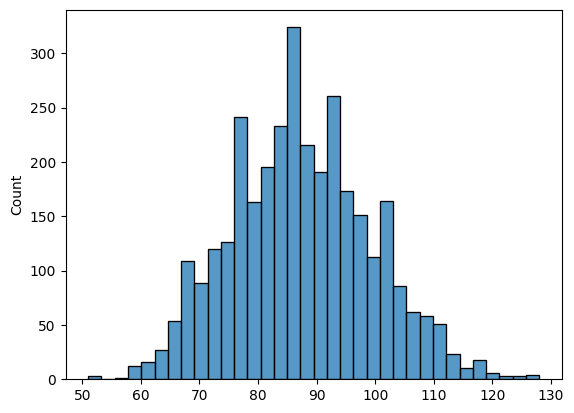

In [52]:
sns.histplot([len(x) for x in X_train_text]);


In [53]:
maxlen=105


In [54]:
X_train_pad = pad_sequences(X_train_text, dtype=float, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_text, dtype=float, padding='post', maxlen=maxlen)


In [55]:
X_train_pad.shape


(3306, 105, 100)

# NLP Model

In [56]:
    def build_model_nlp():
        model = Sequential([
            # layers.Conv1D(105, kernel_size=15, padding='same', activation="relu", input_shape=X_train_pad.shape[1:]),
            # layers.Conv1D(64, kernel_size=10, padding='same', activation="relu"),
            # layers.Flatten(),
            layers.LSTM(105, input_shape=X_train_pad.shape[1:]),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.15),
            layers.Dense(6, activation='softmax'),
        ])
    
        model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])
        return model
    
    model_nlp = build_model_nlp()
    model_nlp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 105)               86520     
                                                                 
 dense (Dense)               (None, 64)                6784      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 93694 (365.99 KB)
Trainable params: 93694 (365.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
es = EarlyStopping(patience=10)

model_nlp = build_model_nlp()
model_nlp.fit(X_train_pad, y_train,
          validation_split=0.3,
          epochs=50,
          batch_size=32,
          callbacks=[es]
          )


Epoch 1/50
73/73 [==============================] - 3s 36ms/step - loss: 1.7905 - accuracy: 0.1672 - val_loss: 1.7786 - val_accuracy: 0.1905
Epoch 2/50
73/73 [==============================] - 2s 34ms/step - loss: 1.7238 - accuracy: 0.2347 - val_loss: 1.6768 - val_accuracy: 0.2601
Epoch 3/50
73/73 [==============================] - 2s 34ms/step - loss: 1.6935 - accuracy: 0.2524 - val_loss: 1.6636 - val_accuracy: 0.2933
Epoch 4/50
73/73 [==============================] - 2s 34ms/step - loss: 1.6752 - accuracy: 0.2679 - val_loss: 1.6696 - val_accuracy: 0.2581
Epoch 5/50
73/73 [==============================] - 2s 34ms/step - loss: 1.6428 - accuracy: 0.2869 - val_loss: 1.5672 - val_accuracy: 0.3034
Epoch 6/50
73/73 [==============================] - 2s 33ms/step - loss: 1.6119 - accuracy: 0.2934 - val_loss: 1.5947 - val_accuracy: 0.3065
Epoch 7/50
73/73 [==============================] - 2s 34ms/step - loss: 1.6010 - accuracy: 0.2895 - val_loss: 1.5749 - val_accuracy: 0.3105
Epoch 8/50
73

In [58]:
loss, accuracy = model_nlp.evaluate(X_test_pad, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


45/45 [==============================] - 1s 11ms/step - loss: 1.7068 - accuracy: 0.2983
Test loss: 1.7068
Test accuracy: 0.2983


### Confusion Matrix

In [59]:
predictions = model_nlp.predict(X_test_pad)

# Convert probabilities to class labels
class_labels_predictions = np.argmax(predictions, axis=1)


45/45 [==============================] - 1s 11ms/step


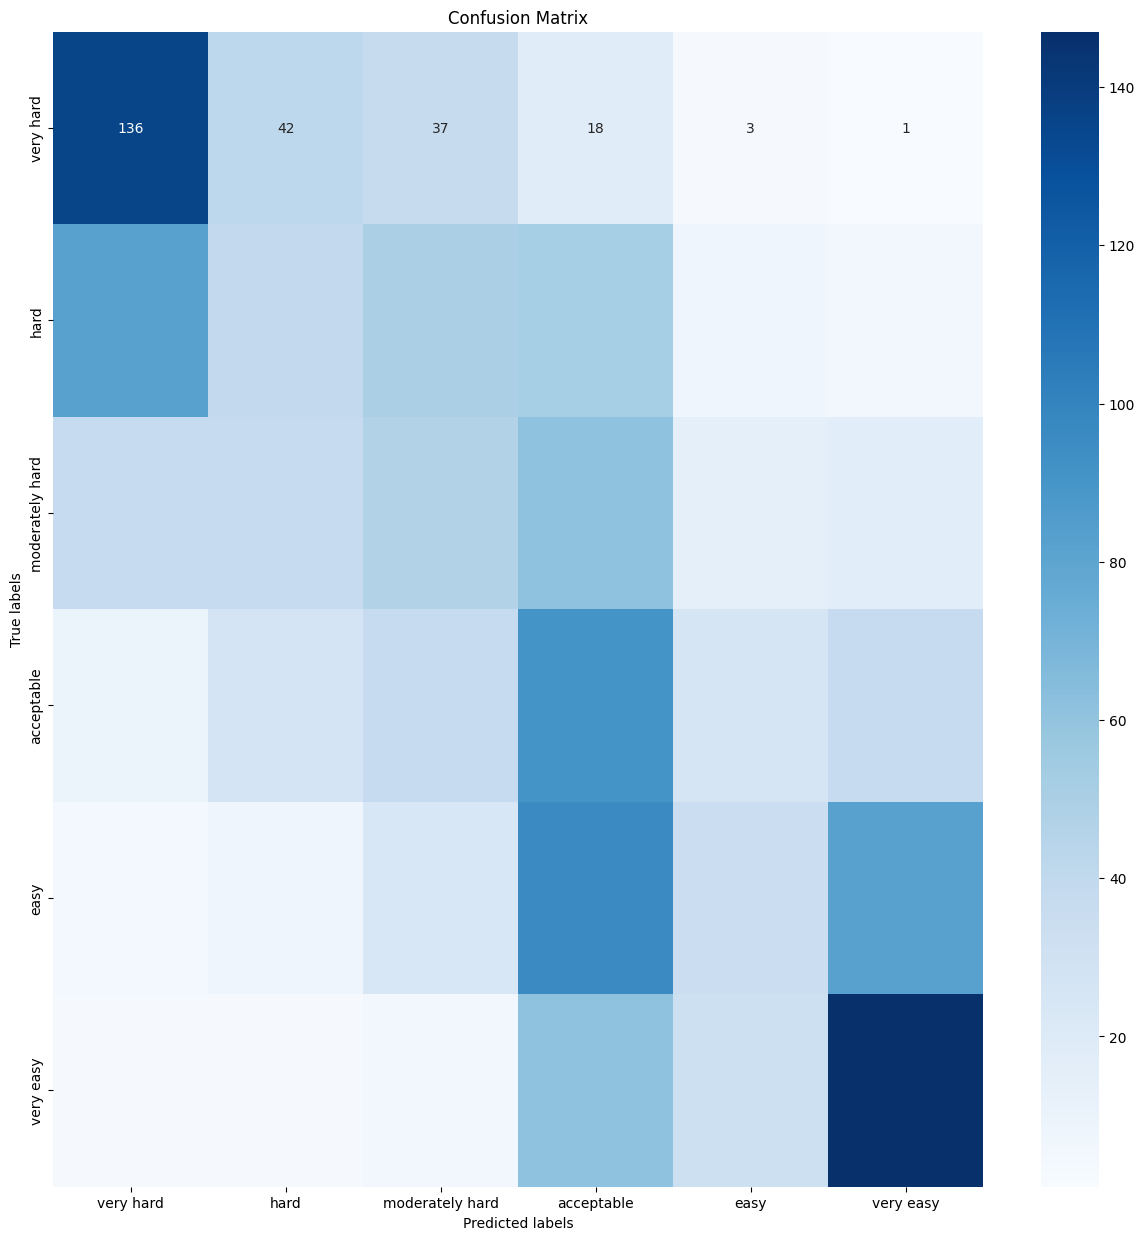

In [80]:
y_true = y_test
y_pred = class_labels_predictions

cm = confusion_matrix(y_true, y_pred)

# Plotting
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(labels_dict.keys()) # replace with your class names
ax.yaxis.set_ticklabels(labels_dict.keys()) # replace with your class names
plt.show()

# Numerical Model

### Scaling

In [61]:
# # Build the pipeline with the different steps
# num_preproc_pipeline = Pipeline([
#     ('standard_scaler', StandardScaler()),

# ])


In [62]:
X_train_num = X_train.drop(columns=['Excerpt'])
X_test_num = X_test.drop(columns=['Excerpt'])


In [63]:
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)


In [64]:
print(X_train_num.shape)
pd.DataFrame(X_train_num).head()


(3306, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.528652,-0.598320,-0.277377,0.735236,0.266702,1.884031,2.052343,-1.651478,-1.807186,-3.106924,-3.568392,-1.661227,-1.708524,-2.095104,1.353047,-2.476903,3.213892,-0.967436,-2.814386,-1.098298
1,-1.291874,-1.483229,-0.277377,-0.981808,-1.014242,-0.854781,0.034239,0.179622,0.384274,0.549977,-0.247435,0.580840,0.824620,-0.454527,-0.608655,-1.159385,-1.068942,1.046996,0.194797,0.920825
2,-0.936708,-1.040775,-0.277377,-0.552547,-0.587261,-0.307019,-0.425665,0.301849,0.222438,0.854719,0.150467,-0.623626,-0.555945,-0.544803,0.132819,-0.663177,-0.661366,0.199655,0.352636,0.090951
3,0.898319,0.618429,-0.277377,0.091345,0.053211,-0.854781,-0.152460,-0.055608,0.033945,0.245235,0.711612,1.243727,1.021627,1.500619,-0.612350,1.159105,-0.807648,-0.217620,0.744717,-0.294786
4,-0.344764,-0.487707,-0.277377,-0.337916,-0.373770,-0.307019,0.272951,-0.191672,-0.293536,-0.059507,-0.186220,-0.678607,-0.492196,-0.962919,-0.116443,-0.731619,-0.331294,0.025790,-0.592368,-0.074255


In [65]:
def build_model_num():
    model = Sequential([
        layers.Dense(128, activation="relu", input_dim = X_train_num.shape[1]),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.15),
        layers.Dense(6, activation='softmax')
    ])

    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])
    return model

model_num = build_model_num()
model_num.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2688      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                 198       
                                                                 
Total params: 13222 (51.65 KB)
Trainable params: 13222

In [66]:
# def build_model_num():
#     input_num = layers.Input(shape=(X_num.shape[1],))

#     x = layers.Dense(64, activation="relu")(input_num)
#     x = layers.Dense(32, activation="relu")(x)
#     output_num = layers.Dense(1, activation="relu")(x)

#     model_num = models.Model(inputs=input_num, outputs=output_num)

#     return model_num

# model_num = build_model_num()
# model_num.summary()


In [67]:
es = EarlyStopping(patience=10)
model_num = build_model_num()
model_num.fit(X_train_num, y_train,
          validation_split=0.3,
          epochs=50,
          batch_size=32,
          callbacks=[es]
          )


Epoch 1/50
73/73 [==============================] - 0s 1ms/step - loss: 1.6618 - accuracy: 0.2783 - val_loss: 1.5795 - val_accuracy: 0.3216
Epoch 2/50
73/73 [==============================] - 0s 675us/step - loss: 1.5656 - accuracy: 0.3120 - val_loss: 1.5346 - val_accuracy: 0.3306
Epoch 3/50
73/73 [==============================] - 0s 631us/step - loss: 1.5371 - accuracy: 0.3263 - val_loss: 1.5043 - val_accuracy: 0.3377
Epoch 4/50
73/73 [==============================] - 0s 617us/step - loss: 1.5112 - accuracy: 0.3470 - val_loss: 1.5165 - val_accuracy: 0.3377
Epoch 5/50
73/73 [==============================] - 0s 611us/step - loss: 1.5022 - accuracy: 0.3596 - val_loss: 1.4831 - val_accuracy: 0.3448
Epoch 6/50
73/73 [==============================] - 0s 631us/step - loss: 1.4915 - accuracy: 0.3496 - val_loss: 1.4974 - val_accuracy: 0.3488
Epoch 7/50
73/73 [==============================] - 0s 630us/step - loss: 1.4676 - accuracy: 0.3630 - val_loss: 1.4830 - val_accuracy: 0.3558
Epoch 8/

In [68]:
loss, accuracy = model_num.evaluate(X_test_num, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


45/45 [==============================] - 0s 343us/step - loss: 1.4891 - accuracy: 0.3307
Test loss: 1.4891
Test accuracy: 0.3307


### Confusion Matrix

In [69]:
predictions = model_num.predict(X_test_num)

# Convert probabilities to class labels
class_labels_predictions = np.argmax(predictions, axis=1)


45/45 [==============================] - 0s 316us/step


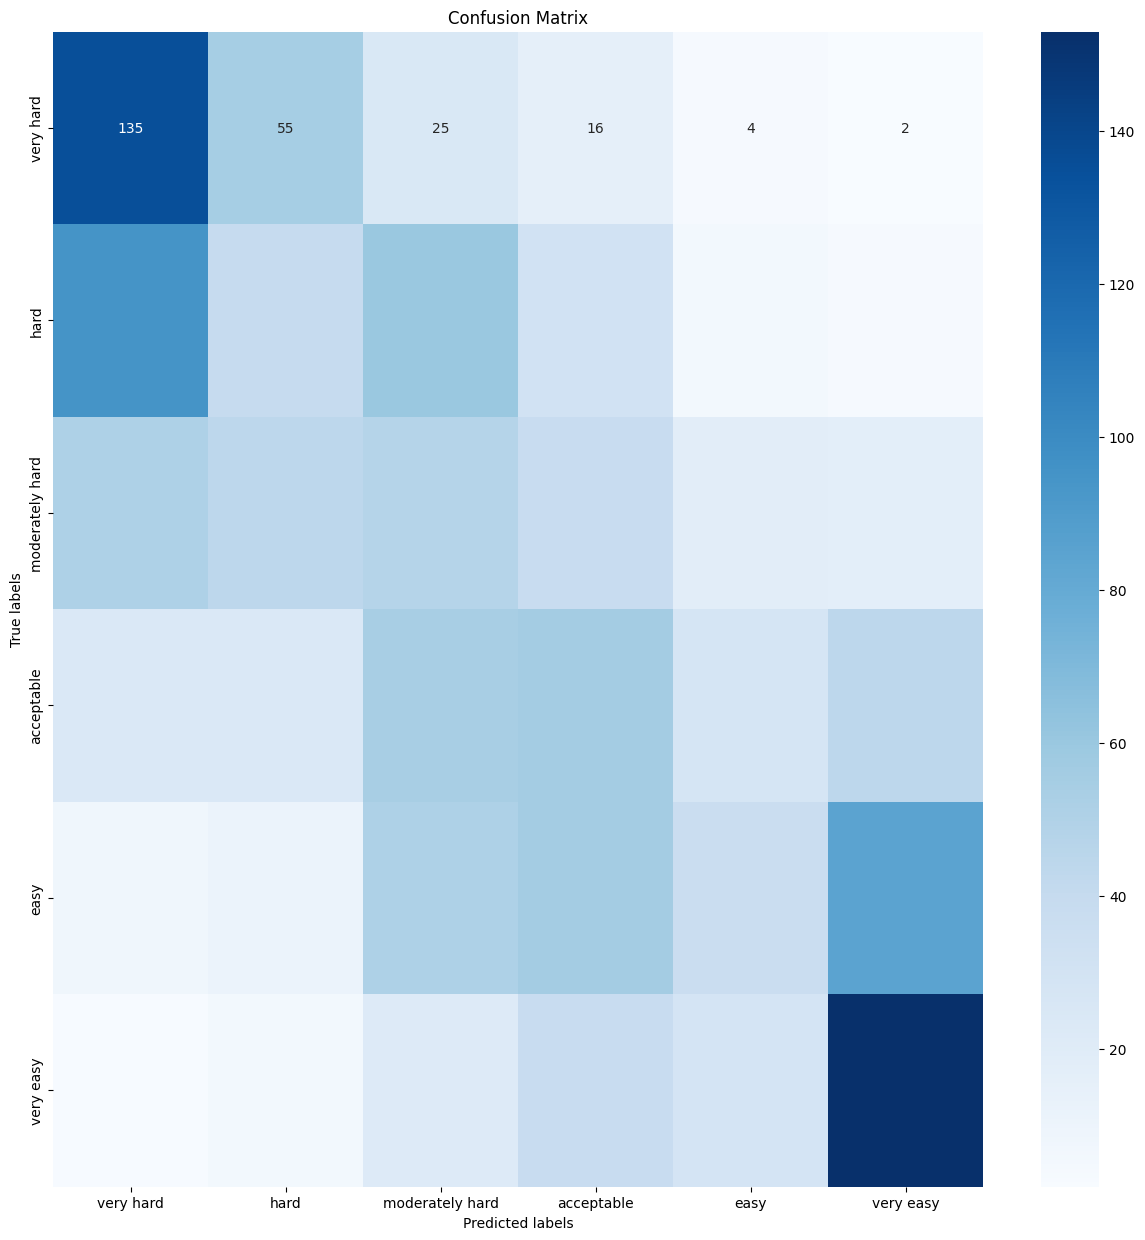

In [70]:
y_true = y_test
y_pred = class_labels_predictions

cm = confusion_matrix(y_true, y_pred)

# Plotting
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(labels_dict.keys()) # replace with your class names
ax.yaxis.set_ticklabels(labels_dict.keys()) # replace with your class names
plt.show()


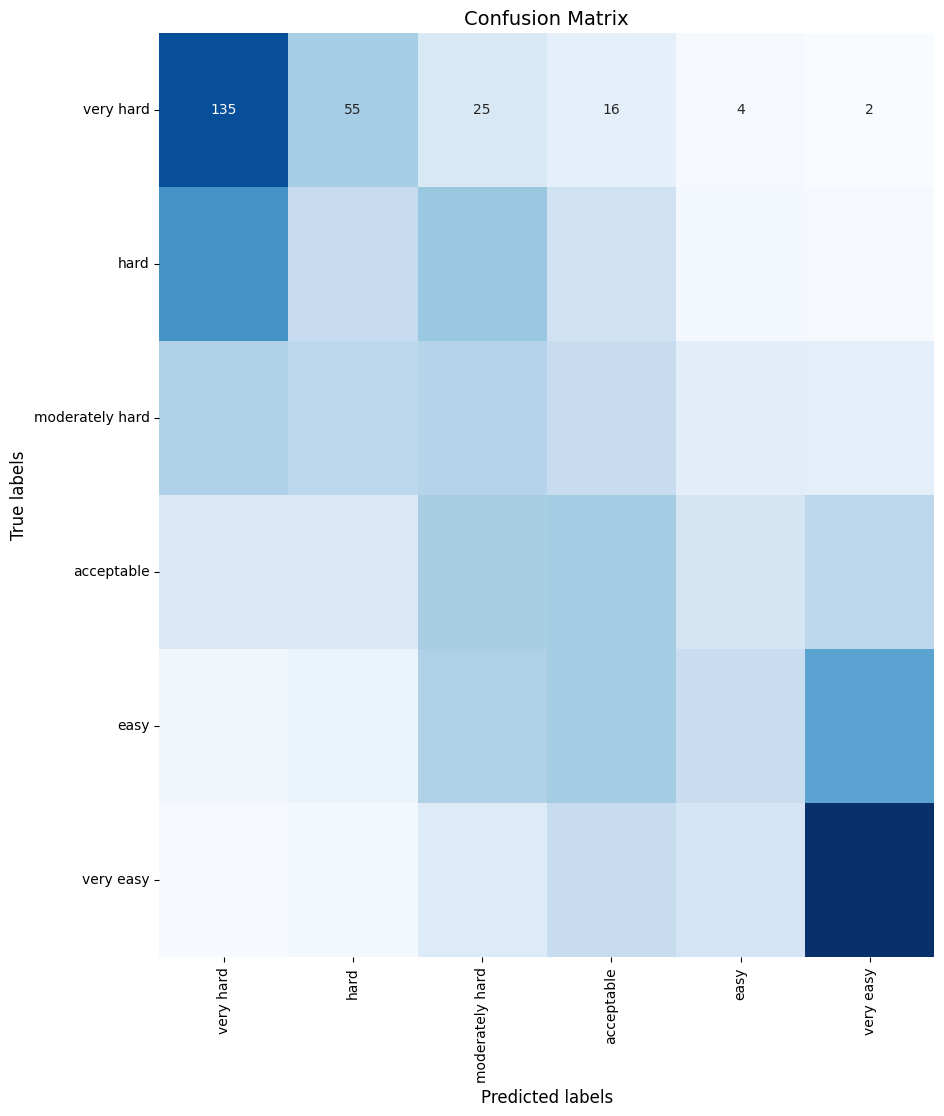

In [71]:
y_true = y_test
y_pred = class_labels_predictions

cm = confusion_matrix(y_true, y_pred)

# Plotting
fig, ax = plt.subplots(figsize=(10, 12))  # Adjust the size as needed
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g', cbar=False)  # Remove color bar

# labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('True labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

# Rotate tick labels
ax.set_xticklabels(labels_dict.keys(), rotation=90, fontsize=10)  # replace with your class names
ax.set_yticklabels(labels_dict.keys(), rotation=0, fontsize=10)  # replace with your class names

plt.show()


# Combining the two models

In [72]:
# Define Inputs and Outputs of NLP model as with Numeric Model
model_nlp = build_model_nlp() # comment-out to keep pre-trained weights not to start from scratch
input_text = model_nlp.input
output_text = model_nlp.output

model_num = build_model_num() # comment-out to keep pre-trained weights not to start from scratch
input_num = model_num.input
output_num = model_num.output


In [73]:
# Let's combine the two streams of data and add two dense layers on top!
inputs = [input_text, input_num]

combined = layers.concatenate([output_text, output_num])

x = layers.Dense(10, activation="relu")(combined)

outputs = layers.Dense(6, activation="softmax")(x)

model_combined = models.Model(inputs=inputs, outputs=outputs)


In [74]:
plot_model(model_combined, "multi_input_model.png", show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [75]:
model_combined.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])
es = EarlyStopping(patience=10)

model_combined.fit(x=[X_train_pad, X_train_num],
                   y=y_train,
                   validation_split=0.3,
                   epochs=100,
                   batch_size=32,
                   callbacks=[es])


Epoch 1/100
73/73 [==============================] - 3s 36ms/step - loss: 1.7666 - accuracy: 0.1742 - val_loss: 1.7224 - val_accuracy: 0.2429
Epoch 2/100
73/73 [==============================] - 2s 34ms/step - loss: 1.7154 - accuracy: 0.2701 - val_loss: 1.6765 - val_accuracy: 0.3024
Epoch 3/100
73/73 [==============================] - 2s 33ms/step - loss: 1.6642 - accuracy: 0.3042 - val_loss: 1.6157 - val_accuracy: 0.3216
Epoch 4/100
73/73 [==============================] - 2s 34ms/step - loss: 1.6108 - accuracy: 0.3124 - val_loss: 1.5782 - val_accuracy: 0.3075
Epoch 5/100
73/73 [==============================] - 2s 34ms/step - loss: 1.5732 - accuracy: 0.3189 - val_loss: 1.5531 - val_accuracy: 0.3256
Epoch 6/100
73/73 [==============================] - 2s 34ms/step - loss: 1.5476 - accuracy: 0.3276 - val_loss: 1.5310 - val_accuracy: 0.3306
Epoch 7/100
73/73 [==============================] - 2s 33ms/step - loss: 1.5264 - accuracy: 0.3392 - val_loss: 1.5122 - val_accuracy: 0.3387
Epoch 

In [76]:
loss, accuracy = model_combined.evaluate([X_test_pad, X_test_num], y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


45/45 [==============================] - 1s 11ms/step - loss: 1.4832 - accuracy: 0.3484
Test loss: 1.4832
Test accuracy: 0.3484


### Confusion Matrix

In [77]:
predictions = model_combined.predict([X_test_pad, X_test_num])

# Convert probabilities to class labels
class_labels_predictions = np.argmax(predictions, axis=1)


45/45 [==============================] - 1s 11ms/step


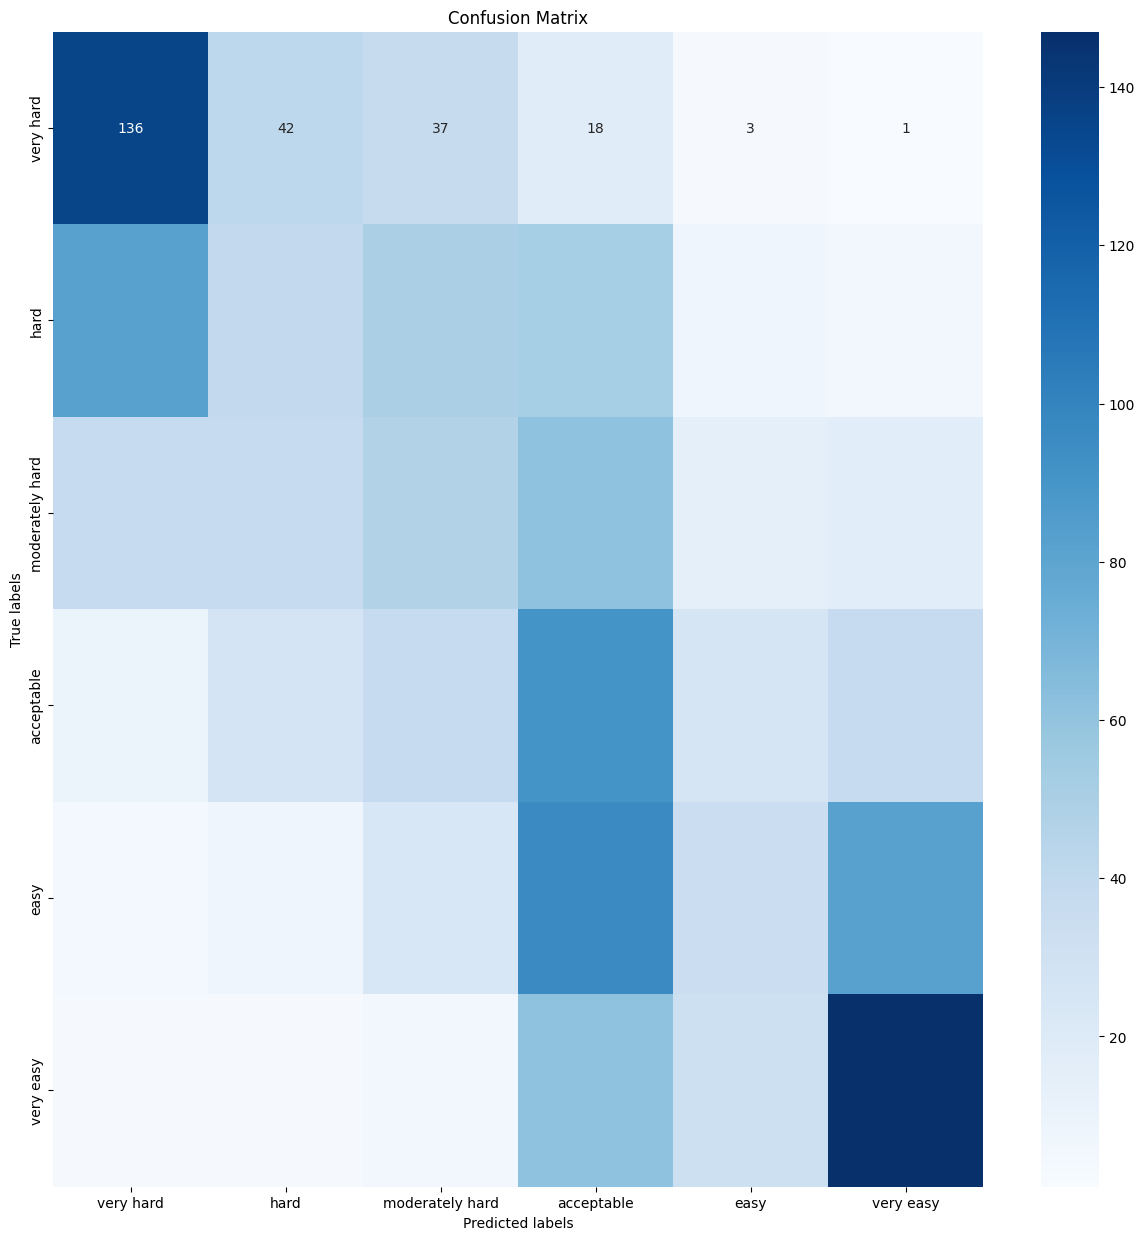

In [78]:
y_true = y_test
y_pred = class_labels_predictions

cm = confusion_matrix(y_true, y_pred)

# Plotting
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(labels_dict.keys()) # replace with your class names
ax.yaxis.set_ticklabels(labels_dict.keys()) # replace with your class names
plt.show()
